# Importação das bibliotecas

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import sklearn
import random

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#utils
from keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier,MLPRegressor
from sklearn.preprocessing import MinMaxScaler


# Importação dos dados

In [2]:
def read_instance(filepath):
    data = pd.read_csv(filepath)
    return(data)

In [3]:
data = read_instance('train.csv')

In [4]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
data.shape

(891, 12)

# Exploração inicial dos dados

% de mulheres sobreviventes: 0.7420382165605095
% de mulheres sobreviventes: 0.18890814558058924


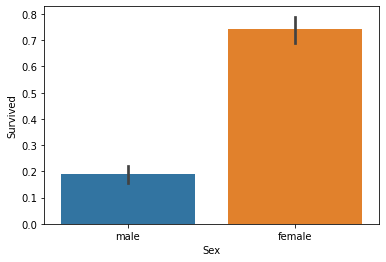

In [6]:
mulher = data.loc[data.Sex == 'female']["Survived"]
m_sobrevivente = sum(mulher)/len(mulher)

print("% de mulheres sobreviventes:", m_sobrevivente )

homem = data.loc[data.Sex == 'male']["Survived"]
h_sobrevivente = sum(homem)/len(homem)

print("% de mulheres sobreviventes:", h_sobrevivente )

sns.barplot(x="Sex", y="Survived", data=data);

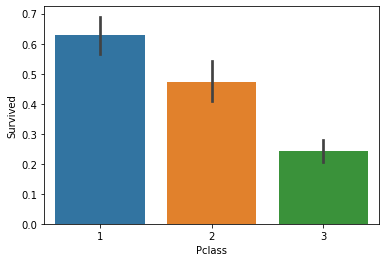

In [7]:
sns.barplot(x="Pclass", y="Survived", data=data);

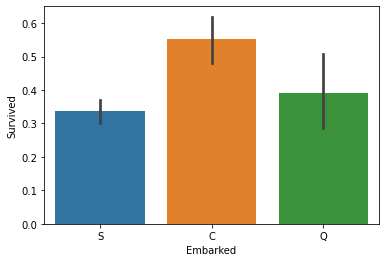

In [8]:
sns.barplot(x="Embarked", y="Survived", data=data);

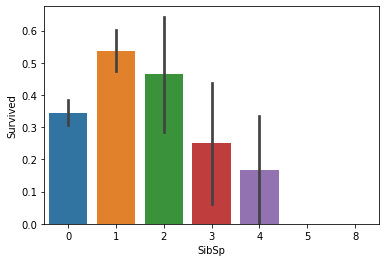

In [9]:
sns.barplot(x="SibSp", y="Survived", data=data);

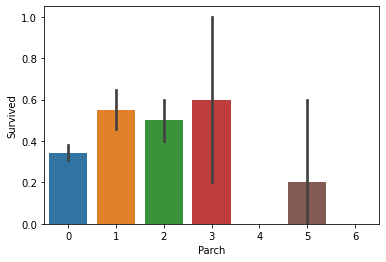

In [10]:
sns.barplot(x="Parch", y="Survived", data=data);

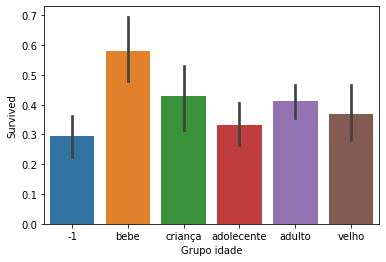

In [11]:
data["Age"] = data["Age"].fillna(0)
bins = [-1, 0, 12, 18, 25, 45, np.inf]
labels = ['-1', 'bebe', 'criança', 'adolecente', 'adulto', 'velho']
data['Grupo idade'] = pd.cut(data["Age"], bins, labels = labels)

sns.barplot(x="Grupo idade", y="Survived", data=data)
plt.show()

# Limpeza dos dados

A função *clean_data* executa a seguintes ações:
1. Drop das colunas Name, Ticket, SibSp, Embarked, Cabin, PassagerId, Fare
2. Preenche os dados faltantes da coluna de idade com a média das idades
3. Transforma a coluna de idades em uma coluna de inteiros
4. Se houver dropa todos os NA(não há)
5. Troca o valor da colna Sex por 1 quando homem e 0 quando mulher

In [12]:
def clean_data(data):
    #data = read_instance(data)
    #retirando a coluna de nomes, local de embarque, tarifa do passageiro, numero da cabine
    #numero do ticket 
    data = data.drop(columns=['Name'])
    data = data.drop(columns=['Ticket'])
    data = data.drop(columns=['SibSp'])
    data = data.drop(columns=['Embarked'])
    data = data.drop(columns=['Cabin'])
    data = data.drop(columns=['PassengerId'])
    data = data.drop(columns=['Fare'])
    
    media_age = data.Age.median()
    data.fillna(media_age, inplace = True)
    
    data["Age"] = data["Age"].astype(int)
  
    data = data.dropna()
    #trocando valores de male e female por 1 e 0
    data.loc[data.Sex=='male','Sex'] = 1
    data.loc[data.Sex=='female','Sex'] = 0
    return data

In [13]:
data = read_instance('train.csv')

A matriz de correlação mostra uma alta correlação entre(0.41) as colunas Parch e SisbSp, e uma alta correlação inversa(-055) entre PClass e Fare dessa forma escolhi manter apenas Parch e PClass 

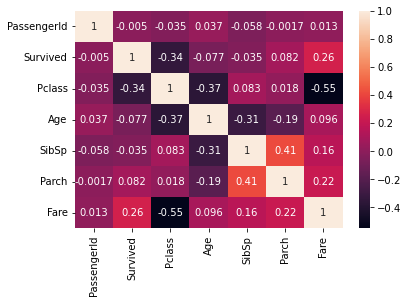

In [14]:
sns.heatmap(data.corr(), annot = True);

In [15]:
data = clean_data(data)
data

,Survived,Pclass,Sex,Age,Parch
0,0,3,1,22,0
1,1,1,0,38,0
2,1,3,0,26,0
3,1,1,0,35,0
4,0,3,1,35,0
...,...,...,...,...,...
886,0,2,1,27,0
887,1,1,0,19,0
888,0,3,0,28,2
889,1,1,1,26,0


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Survived  891 non-null    int64 
 1   Pclass    891 non-null    int64 
 2   Sex       891 non-null    object
 3   Age       891 non-null    int32 
 4   Parch     891 non-null    int64 
dtypes: int32(1), int64(3), object(1)
memory usage: 38.3+ KB


In [17]:
data.describe()

,Survived,Pclass,Age,Parch
count,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.345679,0.381594
std,0.486592,0.836071,13.028212,0.806057
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000
75%,1.000000,3.000000,35.000000,0.000000
max,1.000000,3.000000,80.000000,6.000000


In [18]:
data.shape

(891, 5)

# Criação e normalização treino e teste

In [19]:
x,y = data.drop(columns=['Survived']), data['Survived']

In [20]:
x

,Pclass,Sex,Age,Parch
0,3,1,22,0
1,1,0,38,0
2,3,0,26,0
3,1,0,35,0
4,3,1,35,0
...,...,...,...,...
886,2,1,27,0
887,1,0,19,0
888,3,0,28,2
889,1,1,26,0


In [21]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

### Normalização

Normalização por causa dos grandes valores da coluna idade, não é necessário normalizar y pois ele já está entre 0 e 1

In [22]:
scaler = MinMaxScaler() # padrão (0,1)
X_scaled = scaler.fit_transform(x)

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.2)

In [24]:
print("Shape X_train: ",x_train.shape)
print("Shape y_train: ",y_train.shape)

Shape X_train:  (712, 4)
Shape y_train:  (712,)


In [25]:
print("Shape X_test: ",x_test.shape)
print("Shape y_test: ",y_test.shape)

Shape X_test:  (179, 4)
Shape y_test:  (179,)


In [26]:
x_train

array([[1.        , 1.        , 0.35      , 0.        ],
       [1.        , 0.        , 0.0375    , 0.16666667],
       [0.5       , 0.        , 0.35      , 0.        ],
       ...,
       [1.        , 1.        , 0.35      , 0.16666667],
       [0.5       , 0.        , 0.5       , 0.16666667],
       [1.        , 1.        , 0.5       , 0.16666667]])

#  Implementação do modelo baseado em Rede Neural

A arquitetura escolhida iria ser 12 neuronios em camada única por causa do número de exemplos passados o objetivo era ter 71(712/10) parametros no modelo por conta da regra de ouro

In [27]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10, activation='relu', input_shape = (4, )))
model.add(tf.keras.layers.Dropout(0.05))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

Escolhi a função sigmoid como função de saida pois era uma saida binaria entre 0 e 1

In [28]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                50        
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_1 (Dense)             (None, 1)                 11        
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
None


In [29]:
model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics = ['BinaryAccuracy'])
epochs_hist = model.fit(x_train, y_train, epochs = 100, validation_split = 0.2)
y_pred = model.predict(x_test)

y_pred = (y_pred > 0.5)

Epoch 1/100
18/18 [==============================] - 1s 11ms/step - loss: 0.7366 - binary_accuracy: 0.3866 - val_loss: 0.7146 - val_binary_accuracy: 0.4965
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7197 - binary_accuracy: 0.3831 - val_loss: 0.7020 - val_binary_accuracy: 0.4825
Epoch 3/100
18/18 [==============================] - 0s 2ms/step - loss: 0.7062 - binary_accuracy: 0.3708 - val_loss: 0.6936 - val_binary_accuracy: 0.4685
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6947 - binary_accuracy: 0.4552 - val_loss: 0.6874 - val_binary_accuracy: 0.5035
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6862 - binary_accuracy: 0.5852 - val_loss: 0.6818 - val_binary_accuracy: 0.6084
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.6786 - binary_accuracy: 0.6397 - val_loss: 0.6763 - val_binary_accuracy: 0.6224
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - lo

18/18 [==============================] - 0s 2ms/step - loss: 0.4780 - binary_accuracy: 0.7873 - val_loss: 0.5238 - val_binary_accuracy: 0.7552
Epoch 54/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4778 - binary_accuracy: 0.7961 - val_loss: 0.5226 - val_binary_accuracy: 0.7552
Epoch 55/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4895 - binary_accuracy: 0.7786 - val_loss: 0.5216 - val_binary_accuracy: 0.7552
Epoch 56/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4802 - binary_accuracy: 0.7856 - val_loss: 0.5207 - val_binary_accuracy: 0.7552
Epoch 57/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4793 - binary_accuracy: 0.7891 - val_loss: 0.5200 - val_binary_accuracy: 0.7483
Epoch 58/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4700 - binary_accuracy: 0.7944 - val_loss: 0.5188 - val_binary_accuracy: 0.7483
Epoch 59/100
18/18 [==============================] - 0s 2ms/step - loss: 0.4

In [30]:
y_pred.max()

True

In [31]:
y_pred.min()

False

# Avaliação do modelo

In [32]:
epochs_hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [33]:
print("ein =", 1-epochs_hist.history['binary_accuracy'][-1])
print("eout =", 1-accuracy_score(y_test,y_pred))

ein = 0.19156414270401
eout = 0.16759776536312854


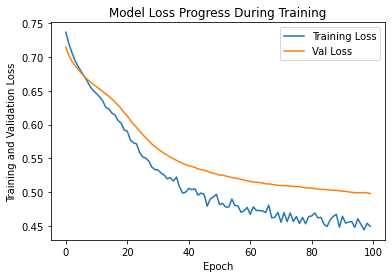

In [34]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Val Loss']);

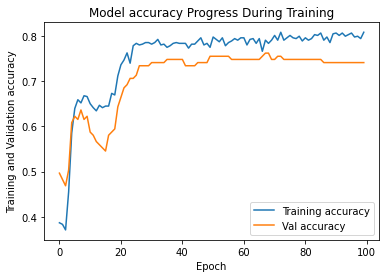

In [35]:
plt.plot(epochs_hist.history['binary_accuracy'])
plt.plot(epochs_hist.history['val_binary_accuracy'])

plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation accuracy')
plt.legend(['Training accuracy','Val accuracy']);

In [36]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88       120
           1       0.77      0.69      0.73        59

    accuracy                           0.83       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.83      0.83      0.83       179



## Modelo extrapolado(titulo de curiosidade para verificar underfitting)

In [37]:
epochs_hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [38]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=30, activation='relu', input_shape=(4, )))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
model.add(tf.keras.layers.Dense(units=40, activation='relu'))
model.add(tf.keras.layers.Dense(units=30, activation='relu'))

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
print(model.summary())

model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics = ['BinaryAccuracy'])
epochs_hist = model.fit(x_train, y_train, epochs = 300, validation_split = 0.2)
y_pred = model.predict(x_test)
#uso da sigmoid, poderias usar o round
y_pred = (y_pred > 0.5)
print("ein =", 1-epochs_hist.history['binary_accuracy'][-1])
print("eout =", 1-accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 30)                150       
                                                                 
 dense_3 (Dense)             (None, 40)                1240      
                                                                 
 dense_4 (Dense)             (None, 40)                1640      
                                                                 
 dense_5 (Dense)             (None, 30)                1230      
                                                                 
 dense_6 (Dense)             (None, 1)                 31        
                                                                 
Total params: 4,291
Trainable params: 4,291
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/300
18/18 [============================

18/18 [==============================] - 0s 2ms/step - loss: 0.4086 - binary_accuracy: 0.8225 - val_loss: 0.5194 - val_binary_accuracy: 0.7552
Epoch 47/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4080 - binary_accuracy: 0.8155 - val_loss: 0.5264 - val_binary_accuracy: 0.7343
Epoch 48/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4110 - binary_accuracy: 0.8260 - val_loss: 0.5151 - val_binary_accuracy: 0.7552
Epoch 49/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4068 - binary_accuracy: 0.8260 - val_loss: 0.5168 - val_binary_accuracy: 0.7552
Epoch 50/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4065 - binary_accuracy: 0.8243 - val_loss: 0.5225 - val_binary_accuracy: 0.7622
Epoch 51/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4103 - binary_accuracy: 0.8243 - val_loss: 0.5281 - val_binary_accuracy: 0.7552
Epoch 52/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4

18/18 [==============================] - 0s 3ms/step - loss: 0.3907 - binary_accuracy: 0.8348 - val_loss: 0.5523 - val_binary_accuracy: 0.7622
Epoch 99/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3920 - binary_accuracy: 0.8383 - val_loss: 0.5593 - val_binary_accuracy: 0.7552
Epoch 100/300
18/18 [==============================] - 0s 2ms/step - loss: 0.3889 - binary_accuracy: 0.8348 - val_loss: 0.5586 - val_binary_accuracy: 0.7552
Epoch 101/300
18/18 [==============================] - 0s 2ms/step - loss: 0.3879 - binary_accuracy: 0.8330 - val_loss: 0.5583 - val_binary_accuracy: 0.7622
Epoch 102/300
18/18 [==============================] - 0s 2ms/step - loss: 0.3888 - binary_accuracy: 0.8366 - val_loss: 0.5582 - val_binary_accuracy: 0.7552
Epoch 103/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3928 - binary_accuracy: 0.8278 - val_loss: 0.5571 - val_binary_accuracy: 0.7622
Epoch 104/300
18/18 [==============================] - 0s 3ms/step - loss

18/18 [==============================] - 0s 3ms/step - loss: 0.3845 - binary_accuracy: 0.8348 - val_loss: 0.5823 - val_binary_accuracy: 0.7552
Epoch 151/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3865 - binary_accuracy: 0.8366 - val_loss: 0.5769 - val_binary_accuracy: 0.7622
Epoch 152/300
18/18 [==============================] - 0s 2ms/step - loss: 0.3876 - binary_accuracy: 0.8295 - val_loss: 0.6098 - val_binary_accuracy: 0.7203
Epoch 153/300
18/18 [==============================] - 0s 2ms/step - loss: 0.3934 - binary_accuracy: 0.8278 - val_loss: 0.5772 - val_binary_accuracy: 0.7552
Epoch 154/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3839 - binary_accuracy: 0.8348 - val_loss: 0.5826 - val_binary_accuracy: 0.7552
Epoch 155/300
18/18 [==============================] - 0s 2ms/step - loss: 0.3880 - binary_accuracy: 0.8383 - val_loss: 0.5907 - val_binary_accuracy: 0.7552
Epoch 156/300
18/18 [==============================] - 0s 2ms/step - los

18/18 [==============================] - 0s 3ms/step - loss: 0.3804 - binary_accuracy: 0.8383 - val_loss: 0.5997 - val_binary_accuracy: 0.7622
Epoch 203/300
18/18 [==============================] - 0s 4ms/step - loss: 0.3828 - binary_accuracy: 0.8383 - val_loss: 0.6019 - val_binary_accuracy: 0.7552
Epoch 204/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3804 - binary_accuracy: 0.8366 - val_loss: 0.6057 - val_binary_accuracy: 0.7552
Epoch 205/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3815 - binary_accuracy: 0.8313 - val_loss: 0.6092 - val_binary_accuracy: 0.7552
Epoch 206/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3821 - binary_accuracy: 0.8383 - val_loss: 0.6106 - val_binary_accuracy: 0.7552
Epoch 207/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3841 - binary_accuracy: 0.8366 - val_loss: 0.6107 - val_binary_accuracy: 0.7552
Epoch 208/300
18/18 [==============================] - 0s 3ms/step - los

18/18 [==============================] - 0s 2ms/step - loss: 0.3802 - binary_accuracy: 0.8383 - val_loss: 0.6252 - val_binary_accuracy: 0.7552
Epoch 255/300
18/18 [==============================] - 0s 2ms/step - loss: 0.3816 - binary_accuracy: 0.8348 - val_loss: 0.6260 - val_binary_accuracy: 0.7622
Epoch 256/300
18/18 [==============================] - 0s 2ms/step - loss: 0.3806 - binary_accuracy: 0.8366 - val_loss: 0.6251 - val_binary_accuracy: 0.7622
Epoch 257/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3804 - binary_accuracy: 0.8366 - val_loss: 0.6272 - val_binary_accuracy: 0.7552
Epoch 258/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3783 - binary_accuracy: 0.8348 - val_loss: 0.6324 - val_binary_accuracy: 0.7552
Epoch 259/300
18/18 [==============================] - 0s 3ms/step - loss: 0.3789 - binary_accuracy: 0.8383 - val_loss: 0.6239 - val_binary_accuracy: 0.7552
Epoch 260/300
18/18 [==============================] - 0s 2ms/step - los

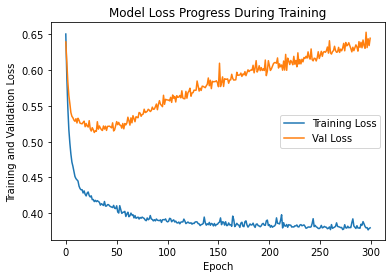

In [39]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Val Loss']);

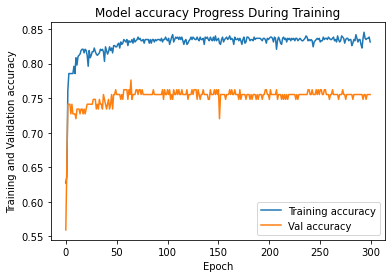

In [40]:
plt.plot(epochs_hist.history['binary_accuracy'])
plt.plot(epochs_hist.history['val_binary_accuracy'])

plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation accuracy')
plt.legend(['Training accuracy','Val accuracy']);

Fica claro o overfitting em uma rede tão grande contudo a rede original acaba por passar muitas épocas sem uma melhora no Eout
com isso em mente utilizei a técnica de early stop

# Ajuste do modelo após avaliação 

In [41]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=12, activation='relu', input_shape=(4, )))
model.add(tf.keras.layers.Dropout(0.05))
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
print(model.summary())

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 12)                60        
                                                                 
 dropout_1 (Dropout)         (None, 12)                0         
                                                                 
 dense_8 (Dense)             (None, 1)                 13        
                                                                 
Total params: 73
Trainable params: 73
Non-trainable params: 0
_________________________________________________________________
None


In [42]:
model.compile(optimizer='Adam', loss='BinaryCrossentropy', metrics = ['binary_accuracy'])

In [43]:
es = EarlyStopping(monitor='val_binary_accuracy', mode='max', verbose=1, patience=50, restore_best_weights=True)

In [44]:
epochs_hist = model.fit(x_train, y_train, epochs = 300, validation_split = 0.2, callbacks = [es])

Epoch 1/300
18/18 [==============================] - 1s 8ms/step - loss: 0.7610 - binary_accuracy: 0.2812 - val_loss: 0.7365 - val_binary_accuracy: 0.3147
Epoch 2/300
18/18 [==============================] - 0s 2ms/step - loss: 0.7410 - binary_accuracy: 0.2777 - val_loss: 0.7228 - val_binary_accuracy: 0.3147
Epoch 3/300
18/18 [==============================] - 0s 2ms/step - loss: 0.7268 - binary_accuracy: 0.2531 - val_loss: 0.7116 - val_binary_accuracy: 0.2448
Epoch 4/300
18/18 [==============================] - 0s 2ms/step - loss: 0.7122 - binary_accuracy: 0.2285 - val_loss: 0.7035 - val_binary_accuracy: 0.2587
Epoch 5/300
18/18 [==============================] - 0s 2ms/step - loss: 0.7033 - binary_accuracy: 0.3374 - val_loss: 0.6971 - val_binary_accuracy: 0.5245
Epoch 6/300
18/18 [==============================] - 0s 2ms/step - loss: 0.6952 - binary_accuracy: 0.5448 - val_loss: 0.6921 - val_binary_accuracy: 0.5524
Epoch 7/300
18/18 [==============================] - 0s 3ms/step - los

18/18 [==============================] - 0s 2ms/step - loss: 0.4612 - binary_accuracy: 0.7873 - val_loss: 0.5169 - val_binary_accuracy: 0.7413
Epoch 54/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4645 - binary_accuracy: 0.7856 - val_loss: 0.5162 - val_binary_accuracy: 0.7413
Epoch 55/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4650 - binary_accuracy: 0.7838 - val_loss: 0.5157 - val_binary_accuracy: 0.7413
Epoch 56/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4605 - binary_accuracy: 0.7838 - val_loss: 0.5146 - val_binary_accuracy: 0.7413
Epoch 57/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4616 - binary_accuracy: 0.7909 - val_loss: 0.5136 - val_binary_accuracy: 0.7413
Epoch 58/300
18/18 [==============================] - 0s 3ms/step - loss: 0.4563 - binary_accuracy: 0.7873 - val_loss: 0.5129 - val_binary_accuracy: 0.7413
Epoch 59/300
18/18 [==============================] - 0s 2ms/step - loss: 0.4

In [45]:
y_pred = model.predict(x_test)
y_pred = (y_pred > 0.5)

In [46]:
epochs_hist.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [47]:
print("ein =", 1-epochs_hist.history['val_binary_accuracy'][-1])
print("eout =", 1 - accuracy_score(y_test,y_pred))

ein = 0.25874125957489014
eout = 0.16759776536312854


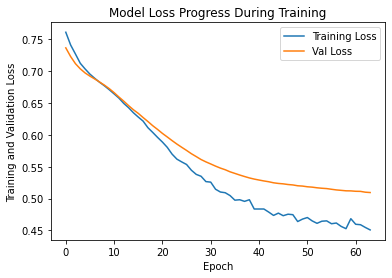

In [48]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Val Loss']);

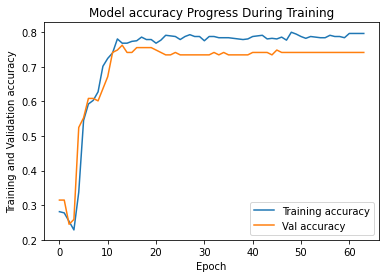

In [49]:
plt.plot(epochs_hist.history['binary_accuracy'])
plt.plot(epochs_hist.history['val_binary_accuracy'])

plt.title('Model accuracy Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation accuracy')
plt.legend(['Training accuracy','Val accuracy']);

In [50]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.97      0.89       120
           1       0.91      0.54      0.68        59

    accuracy                           0.83       179
   macro avg       0.86      0.76      0.78       179
weighted avg       0.85      0.83      0.82       179



### Test contra solver base sklearn

Esse test foi realizado a título de curiosidade, afim de ver como se sai uma rede tão pequena contra um solver com diversas otmizações

O solver base do *sklearn* usa:
* Camada única de 100 neúronios
* 200 épocas 
* Função de ativação ReLu
* solver Adam

In [51]:
#camada única de 100 neuronios é a construção base dele
model = MLPClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.89      0.87       120
           1       0.76      0.69      0.73        59

    accuracy                           0.83       179
   macro avg       0.81      0.79      0.80       179
weighted avg       0.82      0.83      0.82       179



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


# Construção do modelo de Árvore de Decisão


In [52]:
#criando uma validação para os plots futuros
x_train_tree, x_val_tree, y_train_tree, y_val_tree = train_test_split(X_scaled,y, test_size=0.2)

In [53]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

print('Ein: %0.4f' % (1 - accuracy_score(y_train_tree, clf.predict(x_train_tree))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(x_test))))
print(classification_report(y_test, clf.predict(x_test)))

Ein: 0.1081
Eout: 0.1620
              precision    recall  f1-score   support

           0       0.87      0.89      0.88       120
           1       0.77      0.73      0.75        59

    accuracy                           0.84       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.84      0.84      0.84       179



Lista dos atributos dos dados com o seu valor de importância usado na divisão dos nós da árvore de decisão.

Pclass:0.17591404284975717
Sex:0.38593283365970643
Age:0.36754605419270714
Parch:0.07060706929782926


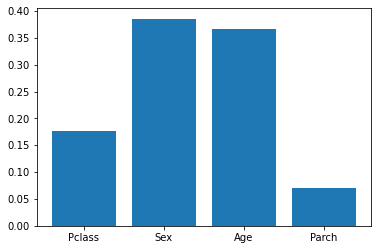

In [54]:
for feature, importance in zip(x.columns, clf.feature_importances_):
    print("{}:{}".format(feature, importance))

plt.bar(x.columns, clf.feature_importances_);

### Plote a árvore de decisão criada pelo classificador usando a função plot_tree

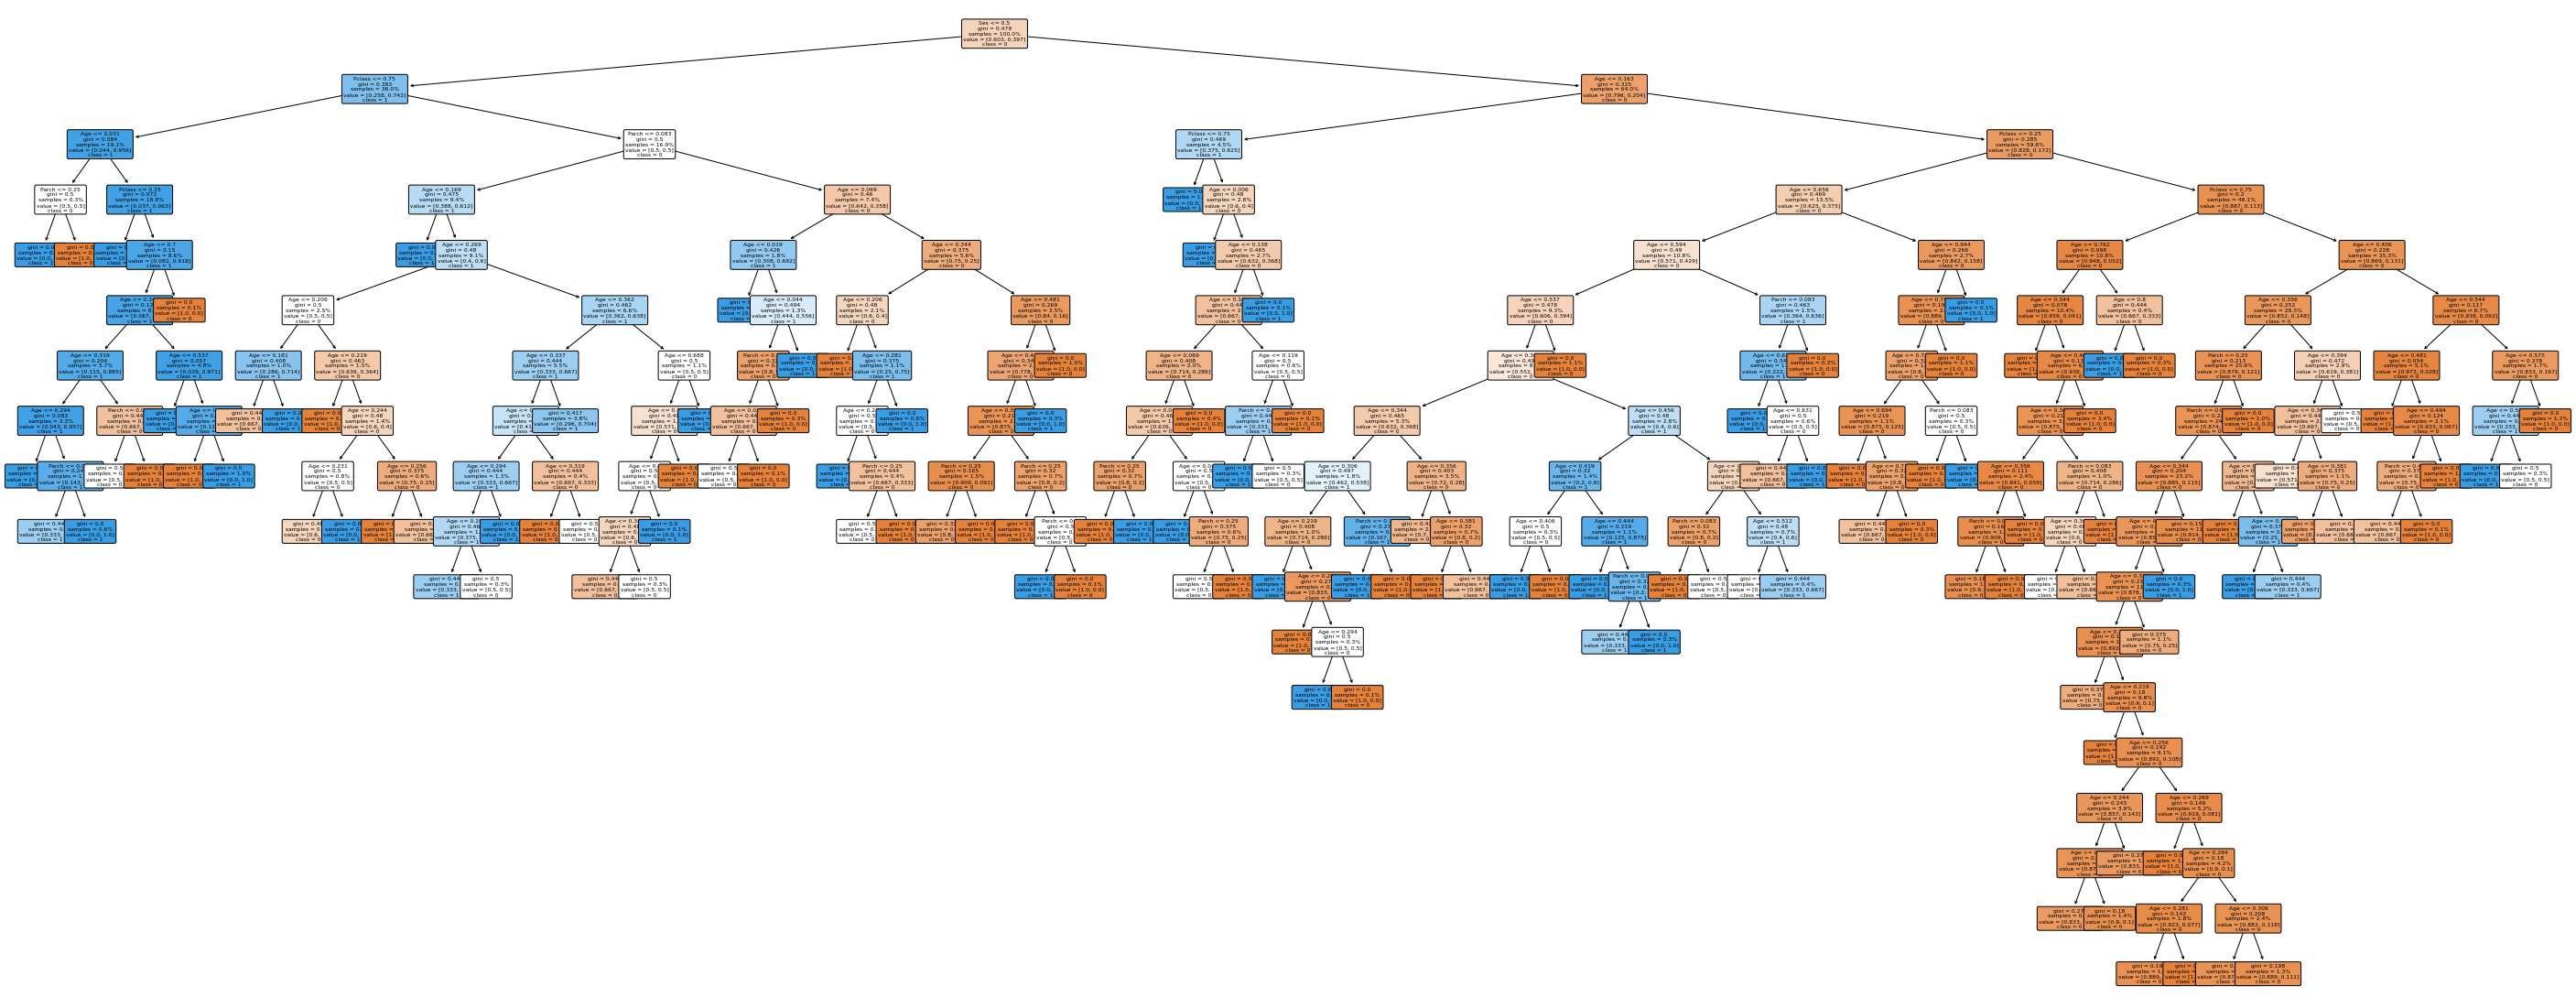

In [55]:
# feature labels
features_label = x.columns

# class label
class_label = ['0','1']

plt.figure(figsize=(50,20))
plot_tree(
    clf, 
    feature_names = features_label,
    class_names = class_label, 
    filled=True, 
    proportion = True,
    fontsize=6, 
    rounded = True)

plt.savefig('arvore_original.png')
plt.show()

66
[0.12876418 0.12876418 0.12876418 0.12876418 0.12877198 0.12881657
 0.12887899 0.12901554 0.12910918 0.12934326 0.12958003 0.13036617
 0.13120887 0.13242059 0.1327483  0.13348399 0.13498763 0.13536478
 0.13583294 0.13676927 0.13727642 0.13832979 0.13958645 0.14239543
 0.14590667 0.14667714 0.14903862 0.14988132 0.15072402 0.15431328
 0.15795828 0.16072112 0.16349215 0.16536481 0.16630114 0.16914317
 0.17009901 0.17220575 0.17431249 0.17958827 0.18304801 0.18550922
 0.1880061  0.18951092 0.19431309 0.1976243  0.20121061 0.20308327
 0.20497154 0.21088212 0.21290624 0.21501298 0.21936436 0.22615925
 0.22856696 0.23345395 0.23603629 0.24471224 0.25424343 0.25814481
 0.26227055 0.2681549  0.28276661 0.29764275 0.3324778  0.47411548]


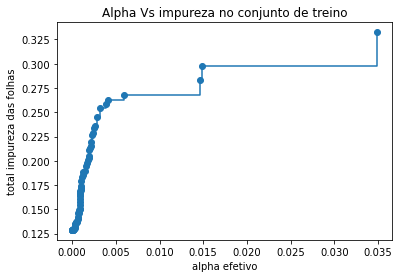

In [56]:
#Recupera os valores efetivos de alpha para a elaboração da fase de prunning
path = clf.cost_complexity_pruning_path(x_train_tree, y_train_tree)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#Plota a relação entre os valores de alpha e impureza das folhas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("alpha efetivo")
ax.set_ylabel("total impureza das folhas")
ax.set_title("Alpha Vs impureza no conjunto de treino")

print(len(ccp_alphas))
print(impurities)

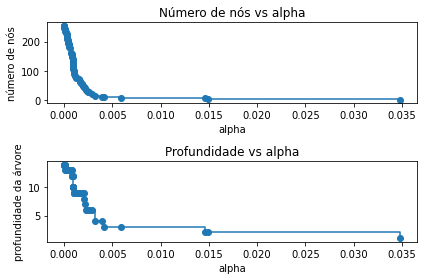

In [57]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train_tree, y_train_tree)
    clfs.append(clf)

#Descarta o último por ser trivial (apenas o nó raiz)
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("número de nós")
ax[0].set_title("Número de nós vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("profundidade da árvore")
ax[1].set_title("Profundidade vs alpha")
fig.tight_layout()

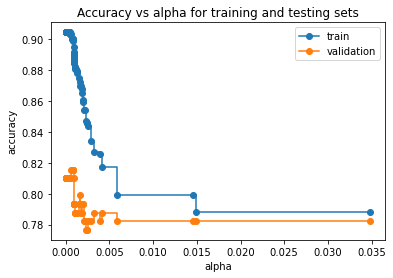

0.0006283264340626855


In [58]:
train_scores = [clf.score(x_train_tree, y_train_tree) for clf in clfs]
val_scores = [clf.score(x_val_tree, y_val_tree) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, val_scores, marker="o", label="validation", drawstyle="steps-post")
ax.legend()
plt.show()

best_acc = 0
for v, i in zip(val_scores, range(len(val_scores))):
    if best_acc < v:
        best_acc = v
        best_alpha = clfs[i].ccp_alpha

print(best_alpha)

### Modificando o algoritmo de acordo com melhor alpha no conjunto de validação

In [59]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=best_alpha)
clf.fit(x_train_tree, y_train_tree)

print('Ein: %0.4f' % (1 - accuracy_score(y_train_tree, clf.predict(x_train_tree))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, clf.predict(x_test))))
print(classification_report(y_test, clf.predict(x_test)))

Ein: 0.0969
Eout: 0.1061
              precision    recall  f1-score   support

           0       0.90      0.95      0.92       120
           1       0.88      0.78      0.83        59

    accuracy                           0.89       179
   macro avg       0.89      0.86      0.88       179
weighted avg       0.89      0.89      0.89       179



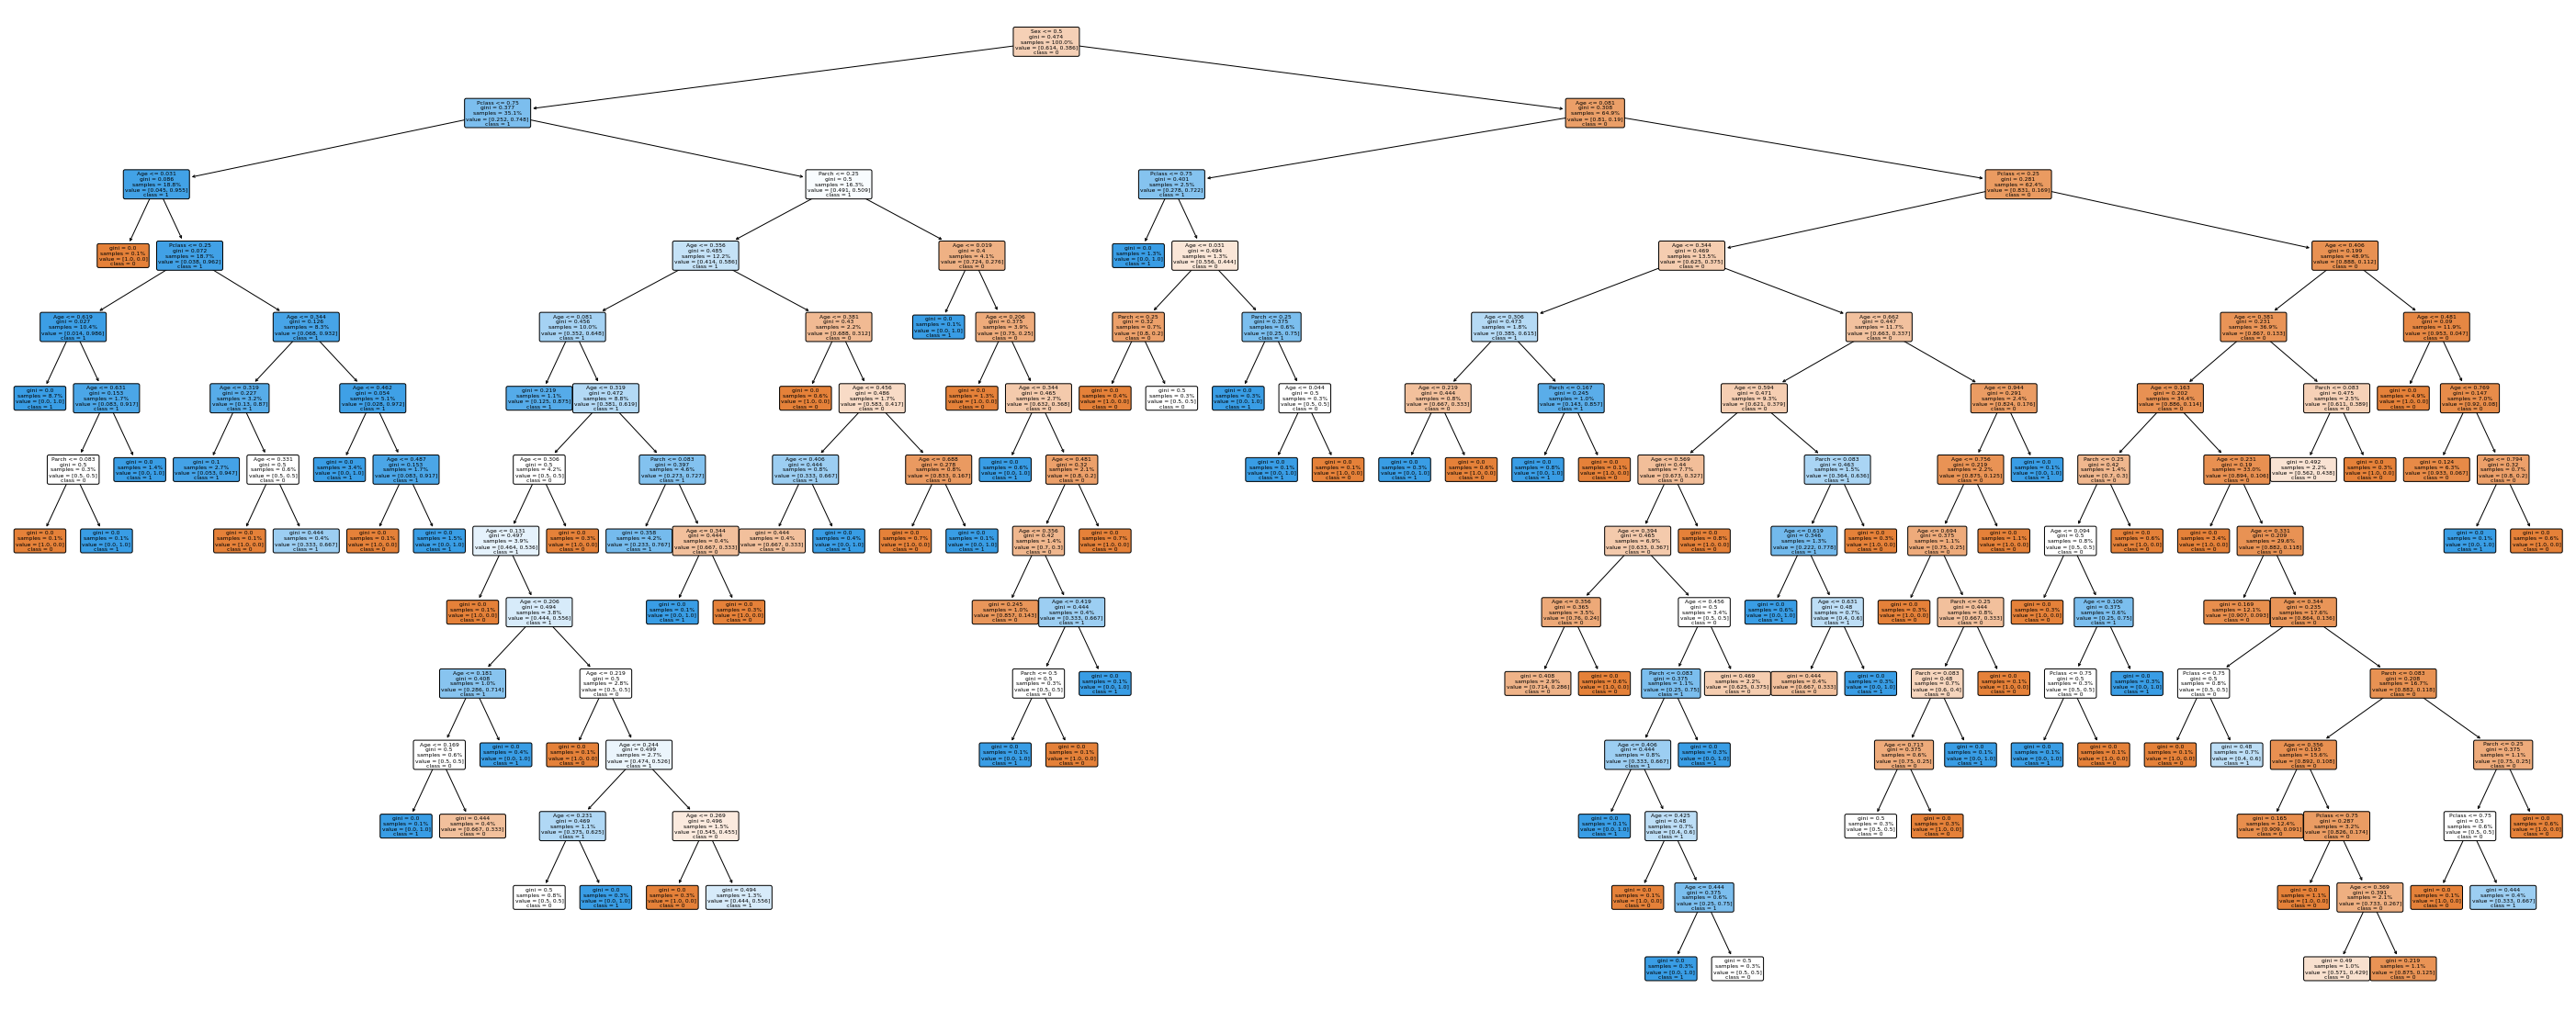

In [60]:
# feature labels
features_label = x.columns

# class label
class_label = ['0','1']

plt.figure(figsize=(50,20))
plot_tree(
    clf, 
    feature_names = features_label,
    class_names = class_label, 
    filled=True, 
    proportion = True,
    fontsize=6, 
    rounded = True)

plt.savefig('arvore_podada.png')
plt.show()

# svm

In [61]:
#número de vetores de suporte
model = SVC(kernel='linear')
model.fit(x_train, y_train)

print("#VS: " + str(model.n_support_))
print(model.support_vectors_)

#VS: [164 164]
[[1.         0.         0.0375     0.16666667]
 [1.         0.         0.1        0.16666667]
 [0.         1.         0.7625     0.        ]
 ...
 [0.         1.         0.3375     0.        ]
 [1.         1.         0.35       0.16666667]
 [0.5        0.         0.5        0.16666667]]


In [62]:
svm_ = svm.SVC(kernel='rbf')

# Create the random grid
param_grid = {
              'C' : np.linspace(1,10,20),
              'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5] 
              }

CV_rf = GridSearchCV(estimator=svm_, param_grid=param_grid, cv = 5, verbose=2, n_jobs=-1)


# Fit the random search model
CV_rf.fit(x_train, y_train)

print(CV_rf.best_estimator_)
# print(CV_rf.best_params_)


print('Ein: %0.4f' % (1 - accuracy_score(y_train, CV_rf.predict(x_train))))
print('Eout: %0.4f' % (1 - accuracy_score(y_test, CV_rf.predict(x_test))))
print(classification_report(y_test, CV_rf.predict(x_test)))

Fitting 5 folds for each of 160 candidates, totalling 800 fits
SVC(gamma=0.5)
Ein: 0.2163
Eout: 0.1676
              precision    recall  f1-score   support

           0       0.87      0.88      0.88       120
           1       0.75      0.73      0.74        59

    accuracy                           0.83       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.83      0.83      0.83       179



# Conclusão

Fica claro que o melhor desempenho foi atingido utilizando árvore, oque provalvelmente se deve ao fato dos dados não estarem totalmente balanceados pois temos 429 amostras da classe "0" e 283 da classe "1" no conjunto de treino, sendo assim talvez o próximo passo nessa analise seria balancear os dados e testar denovo contudo não faz parte do objetivo da disciplina

In [87]:
y_train.value_counts()

0    429
1    283
Name: Survived, dtype: int64

In [85]:
y_train.value_counts(normalize = True)

0    0.602528
1    0.397472
Name: Survived, dtype: float64